# Final Project 2 : SVM and Logistic Regression

Kelompok 3 :

1. Andrea Natania (PYTN-KS17-04)
2. Muhammad Al-Abrour (PYTN-KS17-013)
3. Rofyan Luthfi Mafaza (PYTN-KS17-015)
4. Mufidah Nur Amaliah (PYTN-KS17-021)

## A. Perkenalan
Data yang dipakai dalam project ini adalah data observasi cuaca selama 10 tahun dari beberapa weather station di Australia. Prediksi akan dinyatakan hujan bila hujan diatas 1mm pada hari tersebut. Metode yang dipakai untuk memprediksi dalam project ini adalah SVM dan Logistic Regression. Setelah membangun model, akan dilakukan deployment untuk model terbaik yang didapatkan untuk dipakai pada model inference. 

## B. Import Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.stats.diagnostic import normal_ad

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from scipy.stats import skew
from sklearn.pipeline import make_pipeline

import sys

import pickle

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.6f}'.format
%matplotlib inline
sns.set(style='darkgrid')
params = {'font.family': 'Times New Roman', 'axes.labelsize': 12, 'xtick.labelsize': 12, 
          'ytick.labelsize': 12, 'axes.labelweight': 'bold'}
plt.rcParams.update(params)

## C. Import Data

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.400000,22.900000,0.600000,nan,nan,W,44.000000,W,WNW,20.000000,24.000000,71.000000,22.000000,1007.700000,1007.100000,8.000000,nan,16.900000,21.800000,No,No
1,2008-12-02,Albury,7.400000,25.100000,0.000000,nan,nan,WNW,44.000000,NNW,WSW,4.000000,22.000000,44.000000,25.000000,1010.600000,1007.800000,nan,nan,17.200000,24.300000,No,No
2,2008-12-03,Albury,12.900000,25.700000,0.000000,nan,nan,WSW,46.000000,W,WSW,19.000000,26.000000,38.000000,30.000000,1007.600000,1008.700000,nan,2.000000,21.000000,23.200000,No,No
3,2008-12-04,Albury,9.200000,28.000000,0.000000,nan,nan,NE,24.000000,SE,E,11.000000,9.000000,45.000000,16.000000,1017.600000,1012.800000,nan,nan,18.100000,26.500000,No,No
4,2008-12-05,Albury,17.500000,32.300000,1.000000,nan,nan,W,41.000000,ENE,NW,7.000000,20.000000,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.800000,23.400000,0.000000,nan,nan,E,31.000000,SE,ENE,13.000000,11.000000,51.000000,24.000000,1024.600000,1020.300000,nan,nan,10.100000,22.400000,No,No
145456,2017-06-22,Uluru,3.600000,25.300000,0.000000,nan,nan,NNW,22.000000,SE,N,13.000000,9.000000,56.000000,21.000000,1023.500000,1019.100000,nan,nan,10.900000,24.500000,No,No
145457,2017-06-23,Uluru,5.400000,26.900000,0.000000,nan,nan,N,37.000000,SE,WNW,9.000000,9.000000,53.000000,24.000000,1021.000000,1016.800000,nan,nan,12.500000,26.100000,No,No
145458,2017-06-24,Uluru,7.800000,27.000000,0.000000,nan,nan,SE,28.000000,SSE,N,13.000000,7.000000,51.000000,24.000000,1019.400000,1016.500000,3.000000,2.000000,15.100000,26.000000,No,No


In [3]:
df.shape

(145460, 23)

Data diatas terdiri dari 23 kolom dan 145460 baris</br>

Dari data di atas didapatkan kolom kolom dibawah dengan penjelasannya:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang akan di prediksi

## D. Data Cleaning

### Check Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Change Data Type

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### Check Duplicated Data

In [7]:
df.duplicated().sum()

0

### Check Null Data

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Impute Missing Values

#### Cek distribusi kolom numerik
$H_0$ : Setiap kolom berisi data numerik terdistribusi secara normal </br>
$H_1$ : Setiap kolom berisi data numerik tidak terdistribusi secara normal

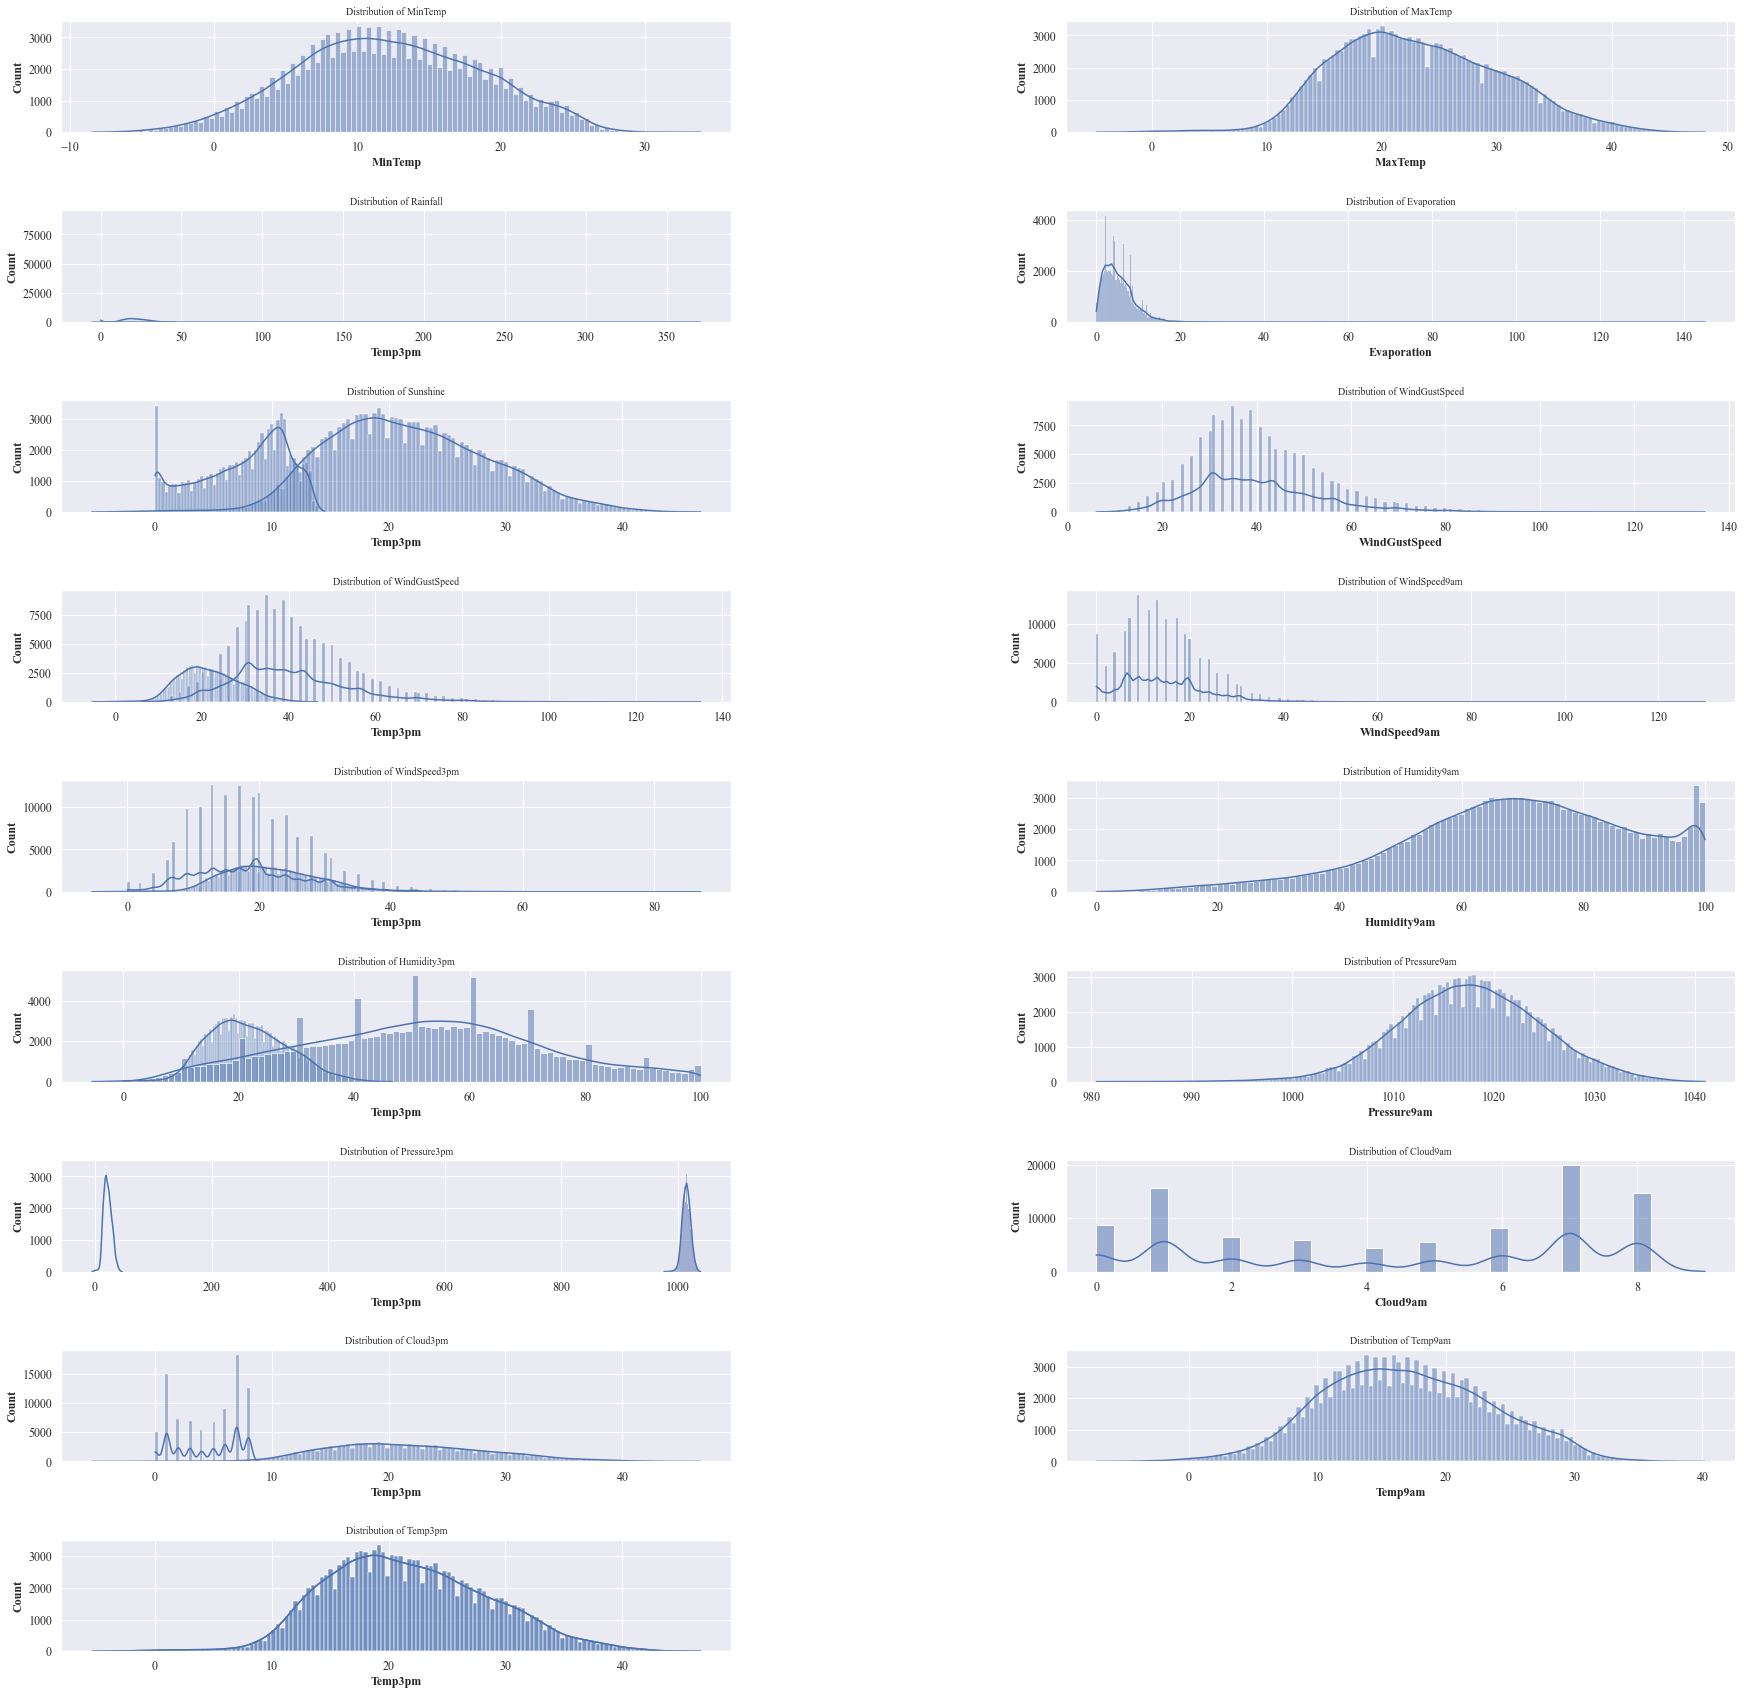

In [9]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.7, wspace=0.5)

dist1  = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
        'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
        'Cloud3pm', 'Temp9am', 'Temp3pm']

def stacked_dist(df, columns):
        length = len(columns)
        if length % 2 == 0:
                row = length // 2
        else:
                row = length // 2 + 1
        odd = 1
        even = 2
        for i in range(0, length, 2):
                if i < length - 1:
                        ax1 = fig.add_subplot(row, 2, odd)
                        sns.histplot(df[columns[i]],kde=True)
                        ax1.set_title(f"Distribution of {columns[i]}", fontsize=10)
                        odd += 2
                        
                        ax2 = fig.add_subplot(row, 2, even)
                        sns.histplot(df[columns[i + 1]], kde=True)
                        ax2.set_title(f"Distribution of {columns[i + 1]}", fontsize=10)
                        even += 2
                if length % 2 != 0:
                        ax = fig.add_subplot(row, 2, odd)
                        sns.histplot(df[columns[-1]], kde=True)
                        ax.set_title(f"Distribution of {columns[-1]}", fontsize=10)
        plt.show()

stacked_dist(df, dist1)

#### Central Tendency dan p-value

In [10]:
central_tendency = pd.DataFrame({'Kolom':dist1,
                                 'Mean':[df[i].mean()  for i in dist1],
                                'Median':[df[i].median()  for i in dist1],
                                'Modus': [df[i].mode()[0]  for i in dist1],
                                'p-value': [normal_ad(df[i])[1] for i in dist1],
                                'skewness': [skew(df[i]) for i in dist1]})
central_tendency['check'] = central_tendency['p-value']<0.05
central_tendency['skew'] = np.where(central_tendency['Mean']< central_tendency['Median'], 'Left skewed', 'Right skewed')
central_tendency

,Kolom,Mean,Median,Modus,p-value,skewness,check,skew
0,MinTemp,12.194034,12.000000,11.000000,0.000000,nan,True,Right skewed
1,MaxTemp,23.221348,22.600000,20.000000,0.000000,nan,True,Right skewed
2,Rainfall,2.360918,0.000000,0.000000,0.000000,nan,True,Right skewed
3,Evaporation,5.468232,4.800000,4.000000,0.000000,nan,True,Right skewed
4,Sunshine,7.611178,8.400000,0.000000,0.000000,nan,True,Left skewed
5,WindGustSpeed,40.035230,39.000000,35.000000,0.000000,nan,True,Right skewed
6,WindGustSpeed,40.035230,39.000000,35.000000,0.000000,nan,True,Right skewed
7,WindSpeed9am,14.043426,13.000000,9.000000,0.000000,nan,True,Right skewed
8,WindSpeed3pm,18.662657,19.000000,13.000000,0.000000,nan,True,Left skewed
9,Humidity9am,68.880831,70.000000,99.000000,0.000000,nan,True,Left skewed


$H_0$ ditolak karena p-value setiap kolom lebih kecil dari 0.05, maka kolom-kolom diatas tidak terdistribusi secara normal. Karena kolom-kolom berisi data numberik akan di impute oleh median dari masing-masing kolom.

In [11]:
for i in dist1:
    df[i].fillna(df[i].median(), inplace=True)
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

Selanjutnya untuk data kolom kategorikal yaitu WindGustDir, WindDir9am, WindDir3pm, RainToday dan RainTomorrow akan di impute oleh modus dari masing masing kolom.

In [12]:
for i in ['WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday' ,'RainTomorrow']:
    df[i].fillna(df[i].mode()[0], inplace=True)
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Data sudah tidak memiliki null values.

## E. EDA

### Rata-Rata Temperatur dari tahun ke tahun

In [13]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
145455,2017-06-21,Uluru,2.800000,23.400000,0.000000,4.800000,8.400000,E,31.000000,SE,ENE,13.000000,11.000000,51.000000,24.000000,1024.600000,1020.300000,5.000000,5.000000,10.100000,22.400000,No,No,2017,6
145456,2017-06-22,Uluru,3.600000,25.300000,0.000000,4.800000,8.400000,NNW,22.000000,SE,N,13.000000,9.000000,56.000000,21.000000,1023.500000,1019.100000,5.000000,5.000000,10.900000,24.500000,No,No,2017,6
145457,2017-06-23,Uluru,5.400000,26.900000,0.000000,4.800000,8.400000,N,37.000000,SE,WNW,9.000000,9.000000,53.000000,24.000000,1021.000000,1016.800000,5.000000,5.000000,12.500000,26.100000,No,No,2017,6
145458,2017-06-24,Uluru,7.800000,27.000000,0.000000,4.800000,8.400000,SE,28.000000,SSE,N,13.000000,7.000000,51.000000,24.000000,1019.400000,1016.500000,3.000000,2.000000,15.100000,26.000000,No,No,2017,6
145459,2017-06-25,Uluru,14.900000,22.600000,0.000000,4.800000,8.400000,W,39.000000,ESE,ESE,17.000000,17.000000,62.000000,36.000000,1020.200000,1017.900000,8.000000,8.000000,15.000000,20.900000,No,No,2017,6


In [14]:

grouped = df[['MinTemp','year']].groupby(['year'], as_index=False).agg({'MinTemp':'mean'})
grouped

,year,MinTemp
0,2007,12.545902
1,2008,12.448811
2,2009,12.158282
3,2010,12.091962
4,2011,12.022263
5,2012,11.228425
6,2013,11.897393
7,2014,12.402533
8,2015,12.230254
9,2016,12.558057


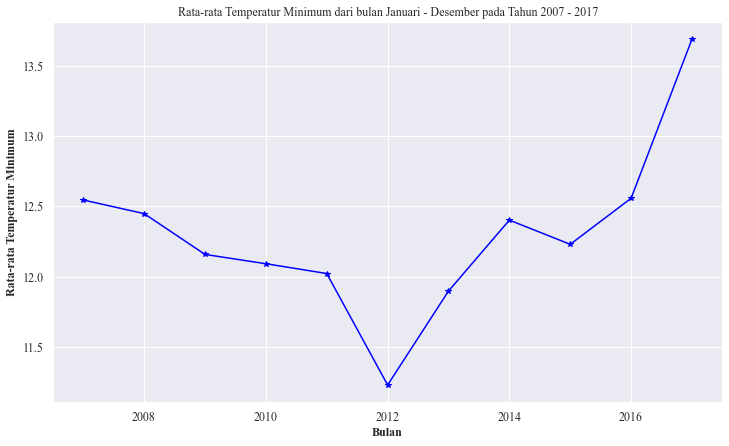

In [15]:
grouped.plot(kind='line', 
                x='year', 
                y='MinTemp', 
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="*")
plt.title("Rata-rata Temperatur Minimum dari bulan Januari - Desember pada Tahun 2007 - 2017")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Temperatur Minimum")
plt.show()

Dari grafik di atas, dapat dilihat bahwa rata-rata temperatur terkecil setiap tahunnya fluktuatif. Temperatur terendah dicapai di tahun 2012 dengan rata-rata temperatur sebesar 11.22 derajat celcius. Sedangkan rata-rata temperatur tertinggi ada pada tahun 2017 degna rata-rata suhu sebesar 13.69 derajat celsius

In [16]:
grouped1 = df[['MaxTemp','year']].groupby(['year'], as_index=False).agg({'MaxTemp':'mean'})
grouped1

,year,MaxTemp
0,2007,25.086885
1,2008,22.873392
2,2009,23.244892
3,2010,22.571493
4,2011,22.540358
5,2012,22.312304
6,2013,23.288705
7,2014,23.787537
8,2015,23.494610
9,2016,23.409239


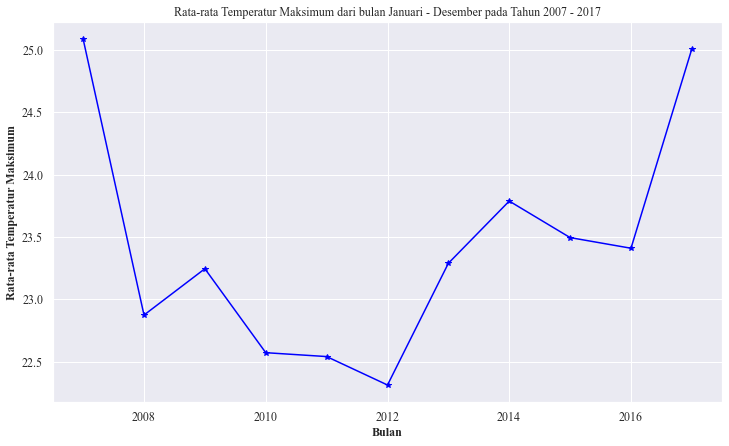

In [17]:
grouped1.plot(kind='line', 
                x='year', 
                y='MaxTemp', 
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="*")
plt.title("Rata-rata Temperatur Maksimum dari bulan Januari - Desember pada Tahun 2007 - 2017")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Temperatur Maksimum")
plt.show()

Dari grafik diatas, Temperatur Maksimum dari tahun ke tahun juga fluktuatif. Temperatur tertinggi ada pada tahun 2007 sebesar 25.09 derajat celsius dan temperatur maksimum terendah ada pada tahun 2012 sebesar 22.31 derajat celsius. 

### Seberapa sering turunnya hujan berdasarkan Location

In [18]:
grouped3 = df[df['Rainfall']>1].groupby(['Location'], as_index=False).agg({'Rainfall':'count'}).sort_values(by='Rainfall', ascending=False).head(5)
grouped3

,Location,Rainfall
33,Portland,1094
8,Cairns,950
43,Walpole,949
22,MountGambier,921
12,Dartmoor,921


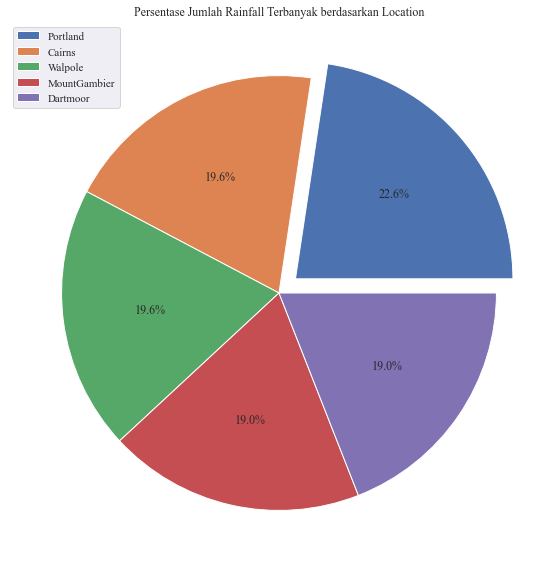

In [19]:
explode=[0.1,0,0,0,0]
plt.figure(figsize=(10,10))
plt.pie(grouped3['Rainfall'], labels=None,autopct='%1.1f%%',explode=explode)
plt.title('Persentase Jumlah Rainfall Terbanyak berdasarkan Location')
plt.legend(labels=grouped3.Location, loc='upper left')
plt.show()

In [20]:
grouped4 = df[df['Rainfall']>1].groupby(['Location'], as_index=False).agg({'Rainfall':'mean'}).sort_values(by='Rainfall', ascending=False).head(5)
grouped4

,Location,Rainfall
39,Townsville,20.084231
13,Darwin,18.975352
16,Katherine,18.701509
8,Cairns,17.858947
11,CoffsHarbour,17.016801


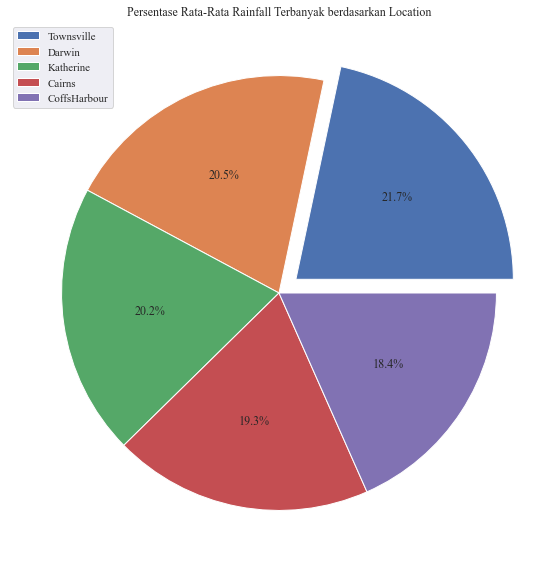

In [21]:
explode=[0.1,0,0,0,0]
plt.figure(figsize=(10,10))
plt.pie(grouped4['Rainfall'], labels=None,autopct='%1.1f%%',explode=explode)
plt.title('Persentase Rata-Rata Rainfall Terbanyak berdasarkan Location')
plt.legend(labels=grouped4.Location, loc='upper left')
plt.show()

Location dengan frekuensi hujan paling banyak adalah Portland sedangkan Rata-rata banyaknya hujan adalah di Townsville dengan rata-rata curah hujan sebesar 20.08mm selama 10 tahun terakhir.

### Data Correlation

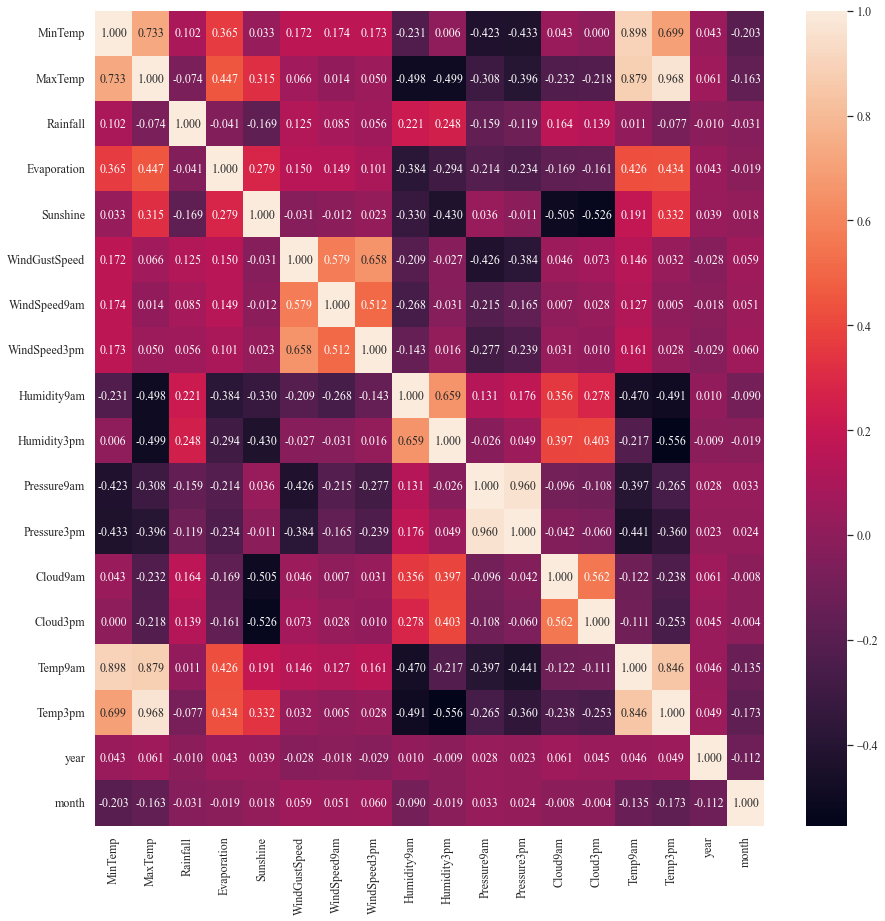

In [22]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

Dari grafik diatas dapat dilihat bahwa korelasi terkuat ada pada kolom Temp3pm dan MaxTemp dengan korelasi sebesar 0.968.

## F. Data Preprocessing

### Label Encoding

In [23]:
label_encoder = preprocessing.LabelEncoder()

In [24]:
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [25]:
categorical = df[['WindGustDir']]
for catcol in categorical:
    dummies = pd.get_dummies(df[catcol], prefix=catcol, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([catcol], axis = 1)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,Albury,13.400000,22.900000,0.600000,4.800000,8.400000,44.000000,W,WNW,20.000000,24.000000,71.000000,22.000000,1007.700000,1007.100000,8.000000,5.000000,16.900000,21.800000,0,0,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,Albury,7.400000,25.100000,0.000000,4.800000,8.400000,44.000000,NNW,WSW,4.000000,22.000000,44.000000,25.000000,1010.600000,1007.800000,5.000000,5.000000,17.200000,24.300000,0,0,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,Albury,12.900000,25.700000,0.000000,4.800000,8.400000,46.000000,W,WSW,19.000000,26.000000,38.000000,30.000000,1007.600000,1008.700000,5.000000,2.000000,21.000000,23.200000,0,0,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.200000,28.000000,0.000000,4.800000,8.400000,24.000000,SE,E,11.000000,9.000000,45.000000,16.000000,1017.600000,1012.800000,5.000000,5.000000,18.100000,26.500000,0,0,2008,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.500000,32.300000,1.000000,4.800000,8.400000,41.000000,ENE,NW,7.000000,20.000000,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.800000,29.700000,0,0,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.800000,23.400000,0.000000,4.800000,8.400000,31.000000,SE,ENE,13.000000,11.000000,51.000000,24.000000,1024.600000,1020.300000,5.000000,5.000000,10.100000,22.400000,0,0,2017,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,Uluru,3.600000,25.300000,0.000000,4.800000,8.400000,22.000000,SE,N,13.000000,9.000000,56.000000,21.000000,1023.500000,1019.100000,5.000000,5.000000,10.900000,24.500000,0,0,2017,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
145457,2017-06-23,Uluru,5.400000,26.900000,0.000000,4.800000,8.400000,37.000000,SE,WNW,9.000000,9.000000,53.000000,24.000000,1021.000000,1016.800000,5.000000,5.000000,12.500000,26.100000,0,0,2017,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
145458,2017-06-24,Uluru,7.800000,27.000000,0.000000,4.800000,8.400000,28.000000,SSE,N,13.000000,7.000000,51.000000,24.000000,1019.400000,1016.500000,3.000000,2.000000,15.100000,26.000000,0,0,2017,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Drop Unnecessary Columns

Kolom Date, month, year, dan location akan dibuang karena tidak berpengaruh pada prediksi. Selain itu, WindDir9am dan WindDir3pm dibuang karena telah direpresentasikan oleh kolom WindGustDir.

In [26]:
df.drop(['Date','month','year', 'WindDir9am','WindDir3pm', 'Location'], axis=1, inplace=True)

### Split Data

Data akan displit menjadi 75% training data dan 25% testing data

In [27]:
train, test = train_test_split(df, test_size=0.25, random_state=2)
train_index = train.index
test_index = test.index

In [28]:
x_train = train.drop(['RainTomorrow'],axis=1)
y_train = train[['RainTomorrow']]
x_test = test.drop(['RainTomorrow'],axis=1)
y_test = test[['RainTomorrow']]

### Scale Data

In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 1. Logistic Regression
### Pendefinisian Model dan Pelatihan Model

In [30]:
lr_model = LogisticRegression(solver='liblinear', random_state=0)
lr_model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

### Evaluasi Model

In [31]:
print(lr_model.intercept_)
print(lr_model.coef_)

[-1.85834169]
[[ 7.40278194e-03 -2.45631942e-01  7.32543182e-02 -1.42880739e-02
  -3.01595927e-01  6.58991671e-01 -1.04502517e-01 -1.95143701e-01
   5.99042602e-02  1.09784510e+00  7.38248894e-01 -1.11179270e+00
   2.03550274e-02  2.85367912e-01  1.17117026e-01  2.07354794e-01
   2.29384213e-01  1.33461464e-02  1.72438931e-02  7.81685588e-02
  -1.68551180e-05  2.74431087e-02  8.32383467e-02  8.50188986e-02
   1.95276540e-02  2.68217008e-02  2.38306782e-02  3.59448576e-02
   5.17564911e-02  7.02668309e-02  7.31697094e-02  4.40331520e-02]]


In [32]:
lr_train_accuracy = lr_model.score(x_train,y_train)
lr_train_accuracy

0.8446583253128007

Akurasi dari model Logistic Regression diatas adalah sebesar 84.47% untuk training data

#### Confusion Matrix

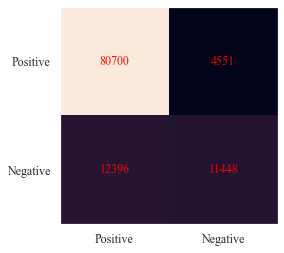

In [33]:
cm = confusion_matrix(y_train, lr_model.predict(x_train))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

In [34]:
y_pred = lr_model.predict(x_train)
train['Estimated RainTomorrow'] = np.round(y_pred,2)
total = train['Sunshine'].count()
total_correct = train['Sunshine'][train['RainTomorrow']==train['Estimated RainTomorrow']].count()
total_wrong = train['Sunshine'][train['RainTomorrow']!=train['Estimated RainTomorrow']].count()
print('Terdapat total correct prediction sebesar', total_correct/total*100)
print('Terdapat total wrong prediction',total_wrong/total*100)

Terdapat total correct prediction sebesar 84.46583253128007
Terdapat total wrong prediction 15.534167468719923


Confusion matrix diatas menunjukkan bahwa nilai false positive lebih kecil dari true positive. Namun jumlah false negative masih lebih besar daripada true negative.

### Model inference

In [35]:
y_pred = lr_model.predict(x_test)
test['Estimated RainTomorrow'] = np.round(y_pred,2)
test.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,Estimated RainTomorrow
113343,13.500000,23.700000,0.000000,4.800000,8.400000,41.000000,22.000000,26.000000,52.000000,49.000000,1013.300000,1016.100000,5.000000,5.000000,22.500000,20.700000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31269,19.800000,25.000000,0.000000,7.800000,8.200000,39.000000,11.000000,24.000000,76.000000,48.000000,1021.600000,1021.300000,5.000000,5.000000,20.700000,24.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10625,9.200000,20.100000,0.000000,1.000000,1.700000,24.000000,2.000000,17.000000,83.000000,72.000000,1026.700000,1023.600000,7.000000,8.000000,14.500000,18.200000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
65630,19.900000,35.900000,0.000000,9.800000,7.200000,63.000000,46.000000,22.000000,39.000000,21.000000,1016.100000,1013.900000,4.000000,4.000000,26.400000,34.800000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48079,14.200000,25.400000,5.600000,4.800000,8.400000,44.000000,22.000000,15.000000,25.000000,18.000000,1014.300000,1014.700000,5.000000,5.000000,18.400000,23.900000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
lr_test_accuracy = lr_model.score(x_test,y_test)
lr_test_accuracy

0.8406709748384436

Akurasi dari testing data diatas adalah sebesar 84.08%

#### Confusion Matrix

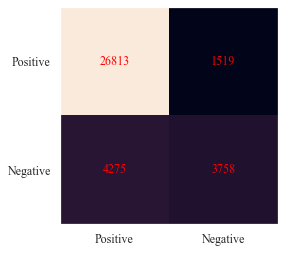

In [37]:
cm = confusion_matrix(y_test, lr_model.predict(x_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Sama seperti training data, confusion matrix diatas menunjukkan bahwa nilai false positive lebih kecil dari true positive. Namun jumlah false negative masih lebih besar daripada true negative.

In [38]:
compare = pd.DataFrame({'Data':['Training Data','Testing Data'],'Tingkat Akurasi':[lr_train_accuracy, lr_test_accuracy]})
compare

,Data,Tingkat Akurasi
0,Training Data,0.844658
1,Testing Data,0.840671


Tingkat akurasi training data lebih besar dari testing data untuk model logistic regression. Maka model ini underfitting meskipun selisihnya tidak signifikan.

## 2. SVM

In [39]:
train.drop(['Estimated RainTomorrow'],axis=1,inplace=True)
test.drop(['Estimated RainTomorrow'],axis=1,inplace=True)

### Pendefinisian dan Pelatihan Model

In [40]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

### Evaluasi Model

In [41]:
y_predc =clf.predict(x_train)
svm_train_accuracy =  metrics.accuracy_score(y_train, y_predc)
print('Accuracy:',svm_train_accuracy)

Accuracy: 0.8440625143223796


Akurasi yang didapatkan dari training data dengan model SVM adalah sebesar 84.41%

In [42]:
train['Estimated RainTomorrow'] = y_predc
train.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,Estimated RainTomorrow
33867,19.600000,24.700000,0.000000,9.000000,0.000000,41.000000,20.000000,19.000000,70.000000,66.000000,1021.200000,1021.100000,7.000000,7.000000,21.500000,21.100000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
84434,8.500000,23.200000,0.200000,2.600000,10.600000,26.000000,7.000000,13.000000,45.000000,47.000000,1022.300000,1019.600000,0.000000,1.000000,17.100000,21.800000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95816,27.000000,32.600000,4.000000,6.000000,8.500000,59.000000,13.000000,20.000000,74.000000,69.000000,1010.000000,1006.100000,6.000000,6.000000,29.800000,31.900000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
100879,7.400000,22.400000,0.000000,6.000000,10.100000,39.000000,20.000000,22.000000,75.000000,45.000000,1006.200000,1003.100000,3.000000,4.000000,15.800000,20.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
89256,18.300000,30.900000,0.000000,11.000000,10.900000,43.000000,19.000000,28.000000,51.000000,42.000000,1016.900000,1013.500000,1.000000,1.000000,26.400000,28.300000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Confusion Matrix

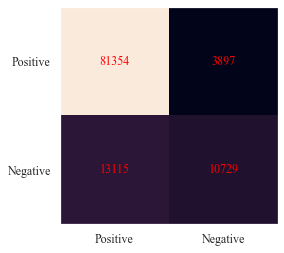

In [43]:
cm = confusion_matrix(y_train, y_predc)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()


Confusion matrix diatas menunjukkan bahwa nilai false positive lebih kecil dari true positive. Namun jumlah false negative masih lebih besar daripada true negative.

### Model Inference

In [44]:
y_predc1 =clf.predict(x_test)
svm_test_accuracy =  metrics.accuracy_score(y_test, y_predc1)
print('Accuracy:', svm_test_accuracy)

Accuracy: 0.8398460057747834


In [45]:
test['Estimated RainTomorrow'] = y_predc1
test.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,Estimated RainTomorrow
113343,13.500000,23.700000,0.000000,4.800000,8.400000,41.000000,22.000000,26.000000,52.000000,49.000000,1013.300000,1016.100000,5.000000,5.000000,22.500000,20.700000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31269,19.800000,25.000000,0.000000,7.800000,8.200000,39.000000,11.000000,24.000000,76.000000,48.000000,1021.600000,1021.300000,5.000000,5.000000,20.700000,24.600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10625,9.200000,20.100000,0.000000,1.000000,1.700000,24.000000,2.000000,17.000000,83.000000,72.000000,1026.700000,1023.600000,7.000000,8.000000,14.500000,18.200000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
65630,19.900000,35.900000,0.000000,9.800000,7.200000,63.000000,46.000000,22.000000,39.000000,21.000000,1016.100000,1013.900000,4.000000,4.000000,26.400000,34.800000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48079,14.200000,25.400000,5.600000,4.800000,8.400000,44.000000,22.000000,15.000000,25.000000,18.000000,1014.300000,1014.700000,5.000000,5.000000,18.400000,23.900000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Confusion Matrix

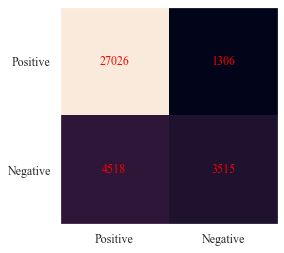

In [46]:
cm = confusion_matrix(y_test, y_predc1)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Dari confusion matrix diatas, didapatkan jumlah true positive lebih besar dibandingkan false positive. Namun, jumlah true negative masih lebih kecil dibandingkan false negative.

In [47]:
compare = pd.DataFrame({'Data':['Training Data','Testing Data'],
                        'Tingkat Akurasi':[svm_train_accuracy, svm_test_accuracy]})
compare

,Data,Tingkat Akurasi
0,Training Data,0.844063
1,Testing Data,0.839846


Dari comparison diatas, tingkat akurasi testing data lebih kecil dibandingkan training data. Maka model ini underfititng. 

## Comparison Between 2 Models

In [48]:
models = ['Logistic Regression', 'SVM']
akurasi_skor_training = {'Metode':models, 'Akurasi':[lr_test_accuracy, svm_test_accuracy]}
akurasi_skor_training = pd.DataFrame(akurasi_skor_training)
akurasi_skor_training

,Metode,Akurasi
0,Logistic Regression,0.840671
1,SVM,0.839846


## G. Kesimpulan

- Dari tahun ke tahun, rata-rata temperatur maksimum dan temperatur minimum fluktuatif. Namun, temperatur maksimum dan temperatur minimum terendah adapada tahun 2012.
- Location dengan frekuensi hujan paling banyak adalah Portland sedangkan Rata-rata banyaknya hujan adalah di Townsville dengan rata-rata curah hujan sebesar 20.08mm selama 10 tahun terakhir.
- Kolom yang dibuang saat melakukan modelling adalah kolom Date, month, year, dan location karena tidak berpengaruh pada prediksi. Selain itu, WindDir9am dan WindDir3pm dibuang karena telah direpresentasikan oleh kolom WindGustDir
- Akurasi testing data dari kedua model lebih rendah dibandingkan training data. Maka kedua model termasuk underfitting. 
- Dari akurasi data testing di atas, akurasi dari model Logistic Regression lebih tinggi dibandingkan model SVM. Maka dari itu model yang akan di deploy adalah model Logistic Regression. 


## Model Deployment

In [49]:
with open("scaler.pkl", "wb")  as f:
    pickle.dump(scaler, f)

In [50]:
with open("lr.pkl", "wb") as f:
    pickle.dump(lr_model,f)

In [51]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear')
)

pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [52]:
with open("pipeline.pkl","wb") as f:
    pickle.dump(pipe,f)

In [53]:
y_pred = pipe.predict(x_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28332
           1       0.71      0.47      0.56      8033

    accuracy                           0.84     36365
   macro avg       0.79      0.71      0.73     36365
weighted avg       0.83      0.84      0.83     36365

